In [1]:
# Make my plots pretty!
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.dpi'] = 100

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Random Forests

Looks like the 20k-5k set was too easy for random forests. Let's make a bigger train/test set.

In [3]:
# Load word embeddings. 100d to be quick
import sys
import torch
sys.path.append('../models/')
import data
reload(data)

<module 'data' from 'data.pyc'>

In [10]:
import pickle
quora_all = pickle.load(open('../data/train_clean.pickle', 'rb'))
print(len(quora_all))
quora_all[:3]

404270


[(['what',
   'is',
   'the',
   'step',
   'by',
   'step',
   'guide',
   'to',
   'invest',
   'in',
   'share',
   'market',
   'in',
   'india',
   '?'],
  ['what',
   'is',
   'the',
   'step',
   'by',
   'step',
   'guide',
   'to',
   'invest',
   'in',
   'share',
   'market',
   '?'],
  0),
 (['what',
   'is',
   'the',
   'story',
   'of',
   'kohinoor',
   '(',
   'koh-i-noor',
   ')',
   'diamond',
   '?'],
  ['what',
   'would',
   'happen',
   'if',
   'the',
   'indian',
   'government',
   'stole',
   'the',
   'kohinoor',
   '(',
   'koh-i-noor',
   ')',
   'diamond',
   'back',
   '?'],
  0),
 (['how',
   'can',
   'i',
   'increase',
   'the',
   'speed',
   'of',
   'my',
   'internet',
   'connection',
   'while',
   'using',
   'a',
   'vpn',
   '?'],
  ['how',
   'can',
   'internet',
   'speed',
   'be',
   'increased',
   'by',
   'hacking',
   'through',
   'dns',
   '?'],
  0)]

In [11]:
np.random.shuffle(quora_all)

In [13]:
quora_train1 = quora_all[:50000]
quora_train2 = quora_all[50000:100000]
quora_train3 = quora_all[10000:150000]
quora_tfidf = quora_all[:350000]
quora_valid = quora_all[350000:]

In [14]:
# Produce a flat list for the tfidf.
def gen_tfidf():
    for q1, q2, y in quora_tfidf:
        yield q1
        yield q2

In [26]:
import messy_features
reload(data)
reload(messy_features)

sample = quora_train1[:17]
sample_slice = messy_features.QuoraSlice(
    '../data/glove.6B.100d.txt', # glove path,
    gen_tfidf(), #tfidf_corpus
    sample, #dataset
)

Loading GloVE.
Loaded 50000 words (D=100) from GloVE.
Analyzing tf-idf.
tf-idf done.
Tensorizing sentences to LongTensors


Columns 0 to 10 
    42     14      0  20071    115      6    474     10    266    188    102
   197    181     88  10672  12493    159      6    950    188  49998  49998
   102     14      0    254    179      4    159  37668   1673    188  49998
    86     41   1243  11069    565      6    474    188  49998  49998  49998
   102     14      0    221    380   3915   1262     21      0  49999    188
    41    913     29  15917    862    461    266     34     41    913    690
    86  49999   1242   1139     38   2595      0    995     61  49999   2589

Columns 11 to 21 
    32      0    654     12     39     32    914    248     42     50   3938
 49998  49998  49998  49998  49998  49998  49998  49998  49998  49998  49998
 49998  49998  49998  49998  49998  49998  49998  49998  49998  49998  49998
 49998  49998  49998  49998  49998  49998  49998  49998  49998  49998 

In [27]:
slice_train1 = messy_features.QuoraSlice(
    None,
    None, #tfidf_corpus
    quora_train1, #dataset
    parent_model=sample_slice)

Taking embeddings from parent.
Tensorizing sentences to LongTensors


Columns 0 to 10 
    42     14      0  20071    115      6    474     10    266    188    102
   197    181     88  10672  12493    159      6    950    188  49998  49998
   102     14      0    254    179      4    159  37668   1673    188  49998
    86     41   1243  11069    565      6    474    188  49998  49998  49998
   102     14      0    221    380   3915   1262     21      0  49999    188
    41    913     29  15917    862    461    266     34     41    913    690
    86  49999   1242   1139     38   2595      0    995     61  49999   2589

Columns 11 to 21 
    32      0    654     12     39     32    914    248     42     50   3938
 49998  49998  49998  49998  49998  49998  49998  49998  49998  49998  49998
 49998  49998  49998  49998  49998  49998  49998  49998  49998  49998  49998
 49998  49998  49998  49998  49998  49998  49998  49998  49998  49998  49998
 49998  49998  49998  49998  49998  49998  4999

In [29]:
slice_valid = messy_features.QuoraSlice(
    None,
    None, #tfidf_corpus
    quora_valid, #dataset
    parent_model=sample_slice)

Taking embeddings from parent.
Tensorizing sentences to LongTensors


Columns 0 to 10 
   197    109    415   3361   1204     35    878     21  19087      5   8160
    14    216   1393      9    933   1121    746   1089      0    772    188
    14     63    130   1062      3    464      3  23994    232     10   5209
   102     14      0     48    873     81   3467     81     35    219     22
  2375   3976     25  12769   2372   1264    188  49998  49998  49998  49998
   102     54      0     85    662    117     83     53    332   7120      4
   102     32      0   2942   8040      3   9339    188  49998  49998  49998

Columns 11 to 21 
     6   1047  11269    188  49998  49998  49998  49998  49998  49998  49998
 49998  49998  49998  49998  49998  49998  49998  49998  49998  49998  49998
 49999    188  49998  49998  49998  49998  49998  49998  49998  49998  49998
   188  49998  49998  49998  49998  49998  49998  49998  49998  49998  49998
 49998  49998  49998  49998  49998  49998  4999

In [30]:
from sklearn.preprocessing import StandardScaler

nrm = StandardScaler()
X_train_n = nrm.fit_transform(slice_train1.X_all.data.numpy())
X_valid_n = nrm.transform(slice_valid.X_all.data.numpy())

In [31]:
from sklearn.ensemble import RandomForestClassifier

def learn_tree(estimators):
    tree = RandomForestClassifier(estimators)
    tree.fit(X_train_n, slice_train1.y.numpy())
    return tree

tree10 = learn_tree(10)

In [60]:
%time tree100 = learn_tree(1000)

CPU times: user 24min 20s, sys: 260 ms, total: 24min 20s
Wall time: 24min 20s


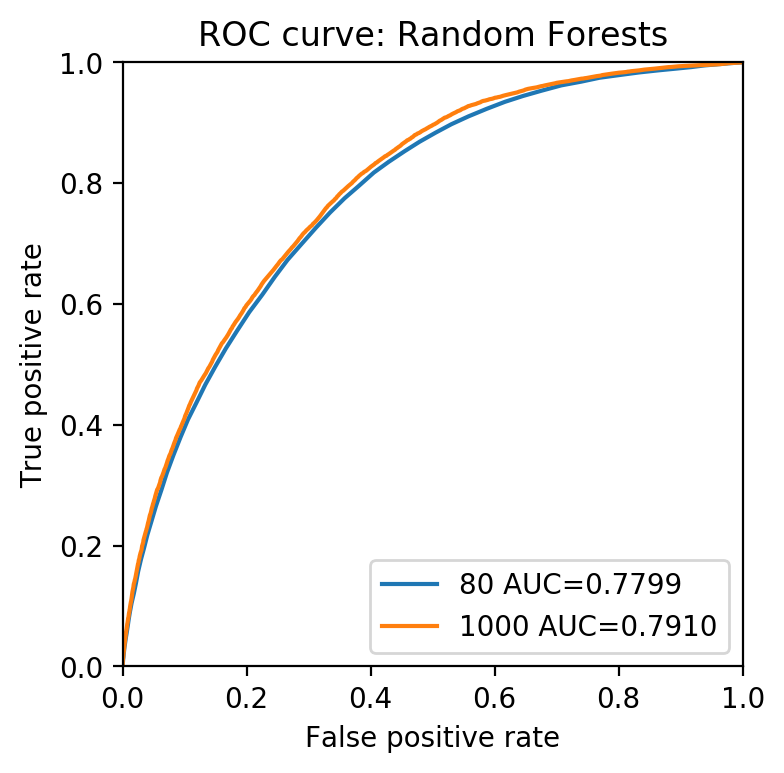

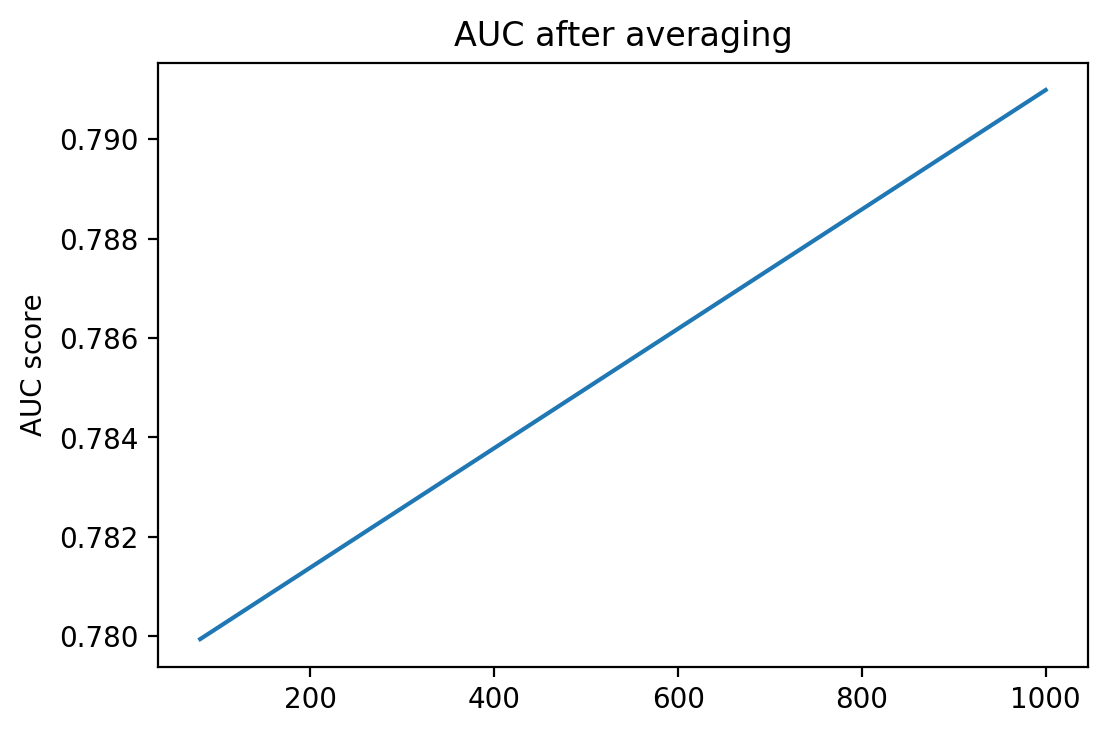

In [65]:
import evaluation
reload(evaluation)
trees = {
    80: tree80,
    1000: tree100
}
def get_tree(n):
    return trees[n].predict_proba(X_valid_n)[:,1]

evaluation.evaluate_results(get_tree, slice_valid.y.numpy(), 'Random Forests', [80, 1000])

In [66]:
auc, thresholds, accs = evaluation.evaluate(slice_valid.y.numpy(), get_tree(1000), '', plot=False, calc_accuracy=True)

In [67]:
accs

[0.63578404274921685,
 0.63587617468214486,
 0.6359498802284872,
 0.63604201216141509,
 0.63615257048092866,
 0.63620784964068544,
 0.63624470241385667,
 0.63628155518702778,
 0.63631840796019901,
 0.63633683434678456,
 0.63637368711995579,
 0.63642896627971257,
 0.63646581905288369,
 0.63650267182605491,
 0.63652109821264047,
 0.63657637737239725,
 0.63659480375898292,
 0.63663165653215403,
 0.63670536207849637,
 0.63672378846508204,
 0.63679749401142438,
 0.63694490510410906,
 0.63698175787728029,
 0.63703703703703707,
 0.63705546342362263,
 0.63711074258337941,
 0.63718444812972175,
 0.63722130090289297,
 0.63722130090289297,
 0.63727658006264976,
 0.63731343283582087,
 0.63738713838216321,
 0.63742399115533444,
 0.637534549474848,
 0.63757140224801911,
 0.63760825502119034,
 0.6376266814077759,
 0.63773723972728946,
 0.63782937166021747,
 0.63790307720655981,
 0.63795835636631659,
 0.63803206191265893,
 0.63806891468583016,
 0.63812419384558683,
 0.63816104661875805,
 0.63823475216

# Gradient Boosted Trees

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.5, max_depth=2, verbose=True)
clf.fit(X_train_n, slice_train1.y.numpy())

      Iter       Train Loss   Remaining Time 
         1           1.2646           21.28m
         2           1.2392           20.58m
         3           1.2231           20.08m
         4           1.2106           19.53m
         5           1.1974           19.58m
         6           1.1826           19.61m
         7           1.1750           19.45m
         8           1.1681           19.35m
         9           1.1595           19.28m
        10           1.1526           19.21m
        20           1.1094           18.63m
        30           1.0834           18.10m
        40           1.0621           17.70m
        50           1.0424           17.36m
        60           1.0265           16.90m
        70           1.0125           16.54m
        80           0.9993           16.25m
        90           0.9865           15.81m
       100           0.9750           15.46m
       200           0.8765           11.48m
       300           0.7925            7.71m
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.5, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=True, warm_start=False)

In [54]:
gbf_eval = clf.predict_proba(X_valid_n)[:,1]
auc, thresholds, accs = evaluation.evaluate(slice_valid.y.numpy(), get_tree(100), '', plot=False, calc_accuracy=True)

In [57]:
clf.score(X_valid_n, slice_valid.y.numpy())

0.70976598489036302

In [58]:
auc

0.78163707193680765

# Summary

So I've pretty much hit a wall with the more traditional methods, at around ~72% accuracy, no matter what I do, with the current set of features.